In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dau = pd.read_csv('./data/section3-dau.csv')
dpu = pd.read_csv('./data/section3-dpu.csv')
install = pd.read_csv('./data/section3-install.csv')

In [3]:
dau_install = dau.merge(install, on=['app_name', 'user_id'])

data = dau_install.merge(dpu,how='left', on=['log_date', 'app_name', 'user_id'])
data['payment'] = data['payment'].fillna(value=0)
data['log_month'] = data['log_date'].map(lambda x: x[:7])
data['install_month'] = data['install_date'].map(lambda x: x[:7])

data = data[['user_id', 'app_name', 'log_month', 'install_month', 'payment']]
data = data.sort_values(by='user_id')

data = data.groupby(by=['log_month','user_id' , 'install_month'])
data = data.sum()
data = data.reset_index()

data['type'] = data.apply(lambda x: 'install' if x['install_month'] == x['log_month'] else 'existing', axis=1)

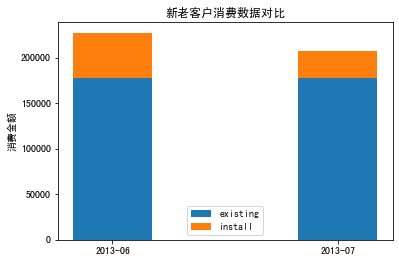

In [5]:
labels = list(data['log_month'].drop_duplicates())
existing_data = list(data.loc[data['type']=='existing'][['log_month','payment']].groupby('log_month').sum().reset_index()['payment'])
install_data = list(data.loc[data['type']=='install'][['log_month', 'payment']].groupby('log_month').sum().reset_index()['payment'])


fig,ax = plt.subplots()
ax.bar(labels, existing_data,0.35,label='existing')
ax.bar(labels, install_data, 0.35,label='install', bottom=existing_data)
ax.set_ylabel('消费金额')
ax.set_title("新老客户消费数据对比")
ax.legend()
plt.show()